<a href="https://colab.research.google.com/github/Roon311/NLP/blob/main/NLP_FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://drive.google.com/uc?export=view&id=1QJ9PAT9q-Ksv_Vs_pLXtLHxjjV-9FMTz)



_Prepared by_  [**Noureldin Mohamed Abdelsalam**](mailto:s-noureldin.hamedo@zewailcity.edu.eg)

<h1><b>ASSIGNMENT 1: Fast Text on Yelp<b></h1>

# Table of Contents

- [Introduction](#scrollTo=2VEm5yhR-PXE)
- [Loading the Data](#scrollTo=epzBgFXySa4t)
- [Imports](#scrollTo=5gM2zk1lS6x1)
- [Preparing the Dataframe](#scrollTo=j_XNVuPmUJ9Q)
- [Explatory Data Analysis on Yelp](#scrollTo=lTOiASM0UQUb)
- [Natural Language Processing on the Text + FastText on Yelp](#scrollTo=PbWzO1qhW87B)
- [T-SNE](#scrollTo=R_ysKc4zPVf0)
- [Facebook pretrained model](#scrollTo=J_7Fn7KREOv8)
- [Comparing the Results](#scrollTo=mf2sNAFiEQwu)




# **Introduction**

<h3><b>Difference Between Encoding and Embedding</b></h2>

*  <font color=gren><b> Encoding:</b></font> Involves converting information from one form to another. In the context of language, it often refers to transforming words or sentences into a specific format, such as numerical codes or binary representations. Encoding doesn't inherently consider the meaning or context of the information; it's more about creating a structured representation.

<img src="https://c8j9w8r3.rocketcdn.me/wp-content/uploads/2018/01/one-hot-word-embedding-vectors-768x276.png" width="600">

*  <font color=gren><b>Embedding:</b></font> Takes context into account. Embedding is about representing words or phrases in a way that preserves their semantic relationships. This means that words with similar meanings or usage will have similar embeddings. Unlike encoding, embedding captures the nuances and relationships within the data, providing a more context-aware representation.

<img src="https://c8j9w8r3.rocketcdn.me/wp-content/uploads/2018/01/3-dimensional-word-embeddings-example-768x362.png" width="600">

<h3><b>Word2Vec Embeddings</b></h2>

*  <font color=gren><b>Continuous Bag of Words:</b></font> predict the center words given the neighbor words.

<img src="https://amitness.com/images/nlp-ssl-center-word-prediction.gif" width="600">

*  <font color=gren><b>Skip-gram</b></font> :predict the neighbor words given a center word.

<img src="https://amitness.com/images/nlp-ssl-neighbor-word-prediction.gif" width="600">

<h3><b>Word2Vec Limitations</b></h2>

*  <font color=gren><b>Out of Vocabulary(OOV) Words:</b></font>can't handle any words it has not encountered during its training.

<img src="https://amitness.com/images/word2vec-oov-tensorflow.png" width="600">

*  <font color=gren><b>Morphology:</b></font>It doesn't do any parameter sharing.Each word is learned uniquely based on the context it appears in.

<img src="https://amitness.com/images/word2vec-radicals.png" width="600">

<h3><b>FastText</b></h2>

FastText tackles those limitations through the use of ngrams.


# **1.Load the Dataset**

In [1]:
! pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d yelp-dataset/yelp-dataset

100% 4.07G/4.07G [00:40<00:00, 170MB/s]
100% 4.07G/4.07G [00:40<00:00, 107MB/s]


In [3]:
!unzip yelp-dataset.zip

Archive:  yelp-dataset.zip
  inflating: Dataset_User_Agreement.pdf  
  inflating: yelp_academic_dataset_business.json  
  inflating: yelp_academic_dataset_checkin.json  
  inflating: yelp_academic_dataset_review.json  
  inflating: yelp_academic_dataset_tip.json  
  inflating: yelp_academic_dataset_user.json  


#**2.Imports**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import re

from gensim.models.fasttext import FastText
from gensim.models.fasttext import load_facebook_model
from gensim.models import Word2Vec
import gensim.downloader as api

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')

nltk.download('stopwords')

nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#**3.Preparing the Dataframe**

In [5]:
df = pd.read_json('yelp_academic_dataset_tip.json', lines=True)
df

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


#**4.Explatory Data Analysis**

##**4.1 Info about the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [ ]:
df.describe()

,compliment_count
count,908915.000000
mean,0.012525
std,0.120763
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


## **4.2 Checking for Nulls**

In [ ]:
df.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

No Nulls are present in this data.

## **4.3 Checking for Duplicates**

In [ ]:
df.duplicated().sum()

67

We have 67 duplicates, lets drop them

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

## **4.4 Visualizations**

### **4.4.1 Distribution of Compliments**

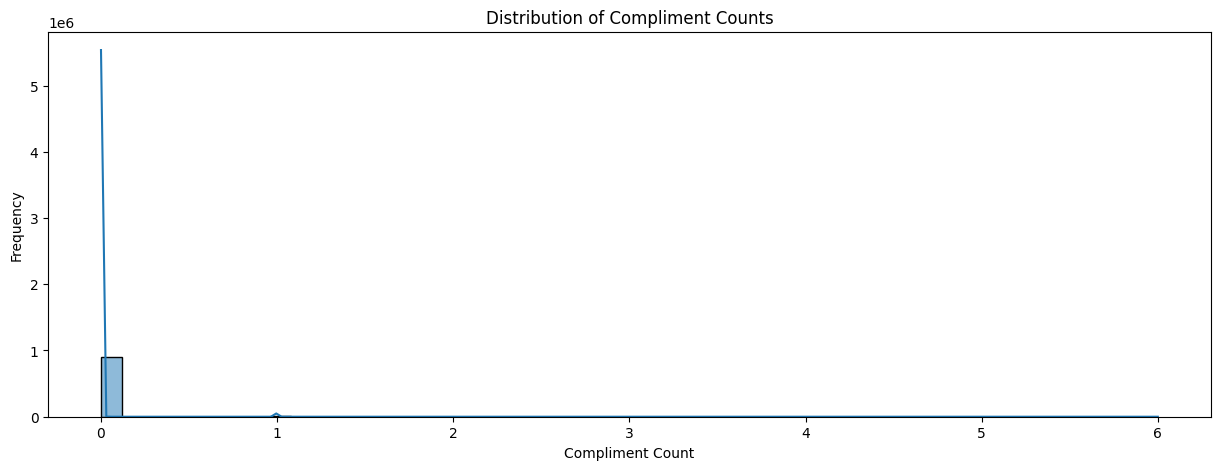

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(df['compliment_count'], bins=50, kde=True)
plt.title('Distribution of Compliment Counts')
plt.xlabel('Compliment Count')
plt.ylabel('Frequency')
plt.show()

most compliments tend to be zero, lets check there counts.

In [ ]:
compliment_counts = df['compliment_count'].value_counts()
compliment_counts

0    898309
1      9821
2       617
3        82
4        14
5         3
6         2
Name: compliment_count, dtype: int64

### **4.4.2 Number of Tips Over Time**

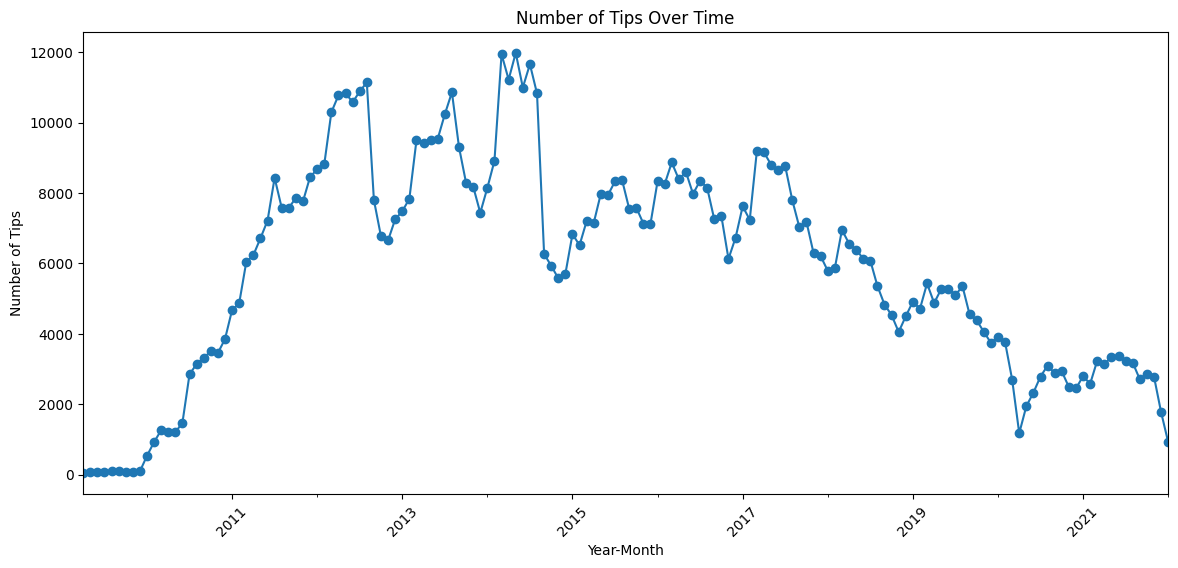

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')

tips_over_time = df.groupby('year_month').size()
plt.figure(figsize=(14, 6))
tips_over_time.plot(kind='line', marker='o')
plt.title('Number of Tips Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tips')
plt.xticks(rotation=45)
plt.show()

### **4.4.3 Top 10 Users with the Most Tips**

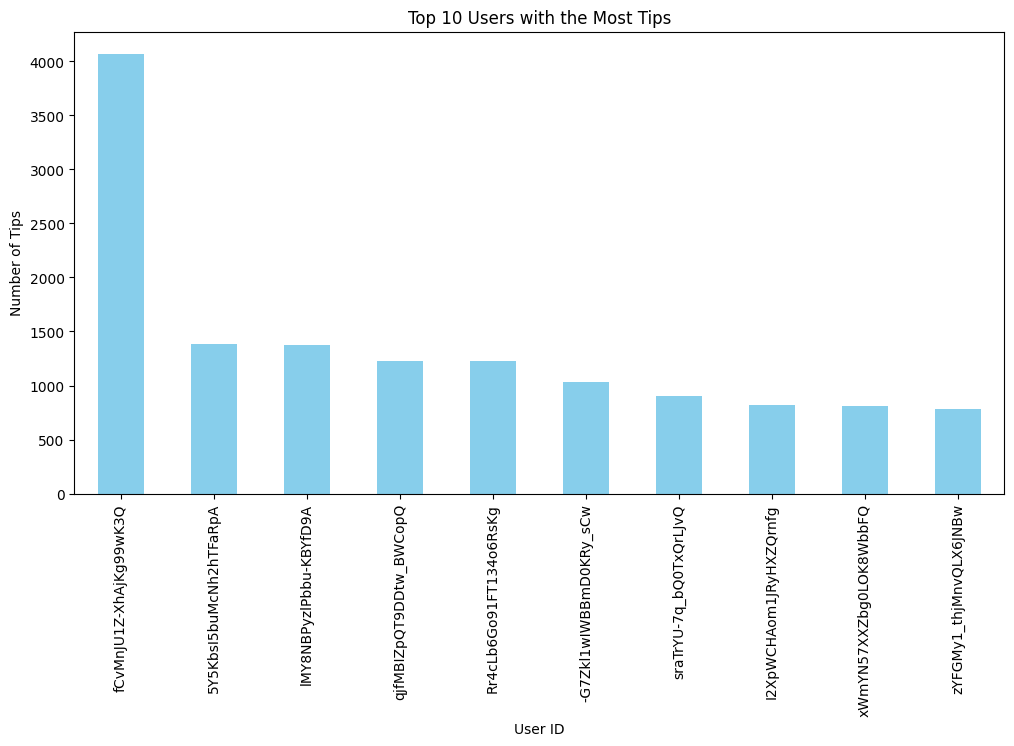

In [ ]:
top_users = df['user_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Users with the Most Tips')
plt.xlabel('User ID')
plt.ylabel('Number of Tips')
plt.show()


In this notebook, we are more interested in studying the text and applying <font color=gren><b>Fast Text model</b></font>.

# **5. Natural Language Processing on the Text**

#**5.1 Preprocessing**

In [6]:
def clean_text(text):
    stop_words = set(stopwords.words('english'))

    lemmatizer = WordNetLemmatizer()

    text = re.sub(r'\W', ' ', text) # Remove extra whitespaces


    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove all special characters


    text = ' '.join(word for word in text.split() if len(word) > 1)# Remove all single characters


    text=text.lower()


    tokens = word_tokenize(text)

    tokens = [lemmatizer.lemmatize(word) for word in tokens]


    tokens = [word for word in tokens if word.lower() not in stop_words]



    return tokens

Lets select just 100000 row to train on.

In [7]:
text_df=df['text'].head(100000)
text_df

0                           Avengers time with the ladies.
1        They have lots of good deserts and tasty cuban...
2                   It's open even when you think it isn't
3                                Very decent fried chicken
4                   Appetizers.. platter special for lunch
                               ...                        
99995    Really overpriced and not very good. Great ser...
99996    Prepare to wait 15-30 minutes. This place is b...
99997    BEST ENTRANCE:\nEnter through the Rite Aid Ent...
99998    My new discovery: they're dog-friendly! ... An...
99999                            They opened early for us!
Name: text, Length: 100000, dtype: object

In [8]:
clean_text = text_df.apply(clean_text)
clean_text

0                                    [avenger, time, lady]
1              [lot, good, desert, tasty, cuban, sandwich]
2                                      [open, even, think]
3                                 [decent, fried, chicken]
4                     [appetizer, platter, special, lunch]
                               ...                        
99995    [really, overpriced, good, great, service, tho...
99996                 [prepare, wait, minute, place, busy]
99997    [best, entrance, enter, rite, aid, entrance, j...
99998       [new, discovery, dog, friendly, kid, friendly]
99999                                   [opened, early, u]
Name: text, Length: 100000, dtype: object

In [ ]:
print(type(clean_text))


<class 'pandas.core.series.Series'>


In [9]:
clean_text=clean_text.tolist()

In [ ]:
clean_text

[['avenger', 'time', 'lady'],
 ['lot', 'good', 'desert', 'tasty', 'cuban', 'sandwich'],
 ['open', 'even', 'think'],
 ['decent', 'fried', 'chicken'],
 ['appetizer', 'platter', 'special', 'lunch'],
 ['chili',
  'cup',
  'single',
  'cheeseburger',
  'onion',
  'pickle',
  'relish',
  'vanilla',
  'coca',
  'cola',
  'far'],
 ['saturday',
  'dec',
  'th',
  'ride',
  'patco',
  'silver',
  'sleigh',
  'santa',
  'elf',
  'decorated',
  'train',
  'center',
  'city',
  'train',
  'leave',
  'lindenwold',
  'pm',
  'make',
  'stop',
  'great',
  'kid'],
 ['probably',
  'best',
  'place',
  'cool',
  'spring',
  'area',
  'watch',
  'game',
  'eat'],
 ['taco'],
 ['starbucks', 'substitute', 'boring', 'downtown', 'tampa', 'ugh', 'never'],
 ['order', 'tortilla', 'soup'],
 ['good', 'definitely', 'coming', 'back'],
 ['hotlight', 'must', 'stop'],
 ['let', 'go', 'yankee'],
 ['basically', 'food', 'rally'],
 ['go',
  'dinner',
  'close',
  'really',
  'yvonne',
  'negative',
  'star',
  'restaurant',

# **5.2 Training FastText Model**

## **Varying Window Size**

### **Window Size 3**

In [10]:
embedding_size=100
window_size=3
model = FastText(sentences=clean_text,
                 vector_size=embedding_size,
                 window=window_size,
                 min_count=1,
                 workers=4,
                 sg=1,
                 epochs=100)
model.save("Nour_fasttext_model")

Training Time 7 Minutes to train

In [11]:
word_vector = model.wv['good']
print(word_vector)


[-0.10241792 -0.42152318 -0.02462333  0.15078072  0.11591136  0.12006285
 -0.02709007  0.3969431   0.0305203  -0.33660296 -0.28164795  0.06097975
 -0.19160472  0.24010342  0.45079935  0.22754821  0.28414315 -0.04986038
 -0.25896662 -0.20738825 -0.09490316  0.3698942  -0.14396098  0.18215027
 -0.10260802 -0.03180158 -0.29306397  0.09168828  0.20972215 -0.20885645
  0.05590577  0.15065286  0.6094652  -0.34243652  0.01970134  0.18802513
  0.11487984  0.40071058  0.06394365  0.0330162   0.13303046 -0.05419036
  0.3671106   0.08697236 -0.0243184  -0.00074163 -0.08088058 -0.06293449
  0.25907275  0.01891505  0.02902391 -0.00952685  0.42827627  0.2597778
  0.01945868 -0.05764334  0.06561337  0.11235707 -0.15180916 -0.05301755
  0.12729198 -0.06958073 -0.37078658  0.46800128  0.25452685  0.3129734
  0.3196691  -0.07219315  0.3527026   0.05526761 -0.1902811   0.2649635
 -0.04262661 -0.21187156  0.12172236  0.1768923   0.13485743  0.08013535
 -0.02051202 -0.23455888 -0.6262917  -0.49829838 -0.01

In [12]:
word_to_test = "good"

similar_words = model.wv.most_similar(word_to_test, topn=10)
print(f"Similar words to '{word_to_test}'")
for word, similarity in similar_words:
    print(f"('{word}', {similarity})")
print('----------------------------------------------------')
opposite_words = model.wv.most_similar(negative=[word_to_test], topn=10)
print(f"Opposite words to '{opposite_words}'")
for word, similarity in opposite_words:
    print(f"('{word}', {similarity})")

Similar words to 'good'
('great', 0.7886011600494385)
('decent', 0.7215960025787354)
('tasty', 0.6992418169975281)
('goood', 0.6951735019683838)
('owesom', 0.6950410008430481)
('greaaat', 0.678383469581604)
('gooood', 0.6672356724739075)
('yummy', 0.6635212898254395)
('yumz', 0.6621168851852417)
('emjoyed', 0.6615437269210815)
----------------------------------------------------
Opposite words to '[('arizona', -0.0505005344748497), ('london', -0.06332817673683167), ('archery', -0.06850225478410721), ('archer', -0.0877581387758255), ('passport', -0.10336654633283615), ('achieve', -0.1040850505232811), ('info', -0.10503257811069489), ('flora', -0.10570713877677917), ('gay', -0.10687343776226044), ('performance', -0.10957872122526169)]'
('arizona', -0.0505005344748497)
('london', -0.06332817673683167)
('archery', -0.06850225478410721)
('archer', -0.0877581387758255)
('passport', -0.10336654633283615)
('achieve', -0.1040850505232811)
('info', -0.10503257811069489)
('flora', -0.105707138776

### **Window Size  5**

In [13]:
embedding_size=100
window_size=5
model = FastText(sentences=clean_text,
                 vector_size=embedding_size,
                 window=window_size,
                 min_count=1,
                 workers=4,
                 sg=1,
                 epochs=100)
model.save("Nour_fasttext_model")

Training Time 12 Minutes to train

In [14]:
word_vector = model.wv['good']
print(word_vector)


[-0.08211443 -0.14209391  0.06585691  0.09964979 -0.07898092  0.07227559
 -0.01913386  0.4175565   0.06244776 -0.49103728 -0.14805053 -0.15176679
 -0.2638389   0.17321342  0.37712878  0.0519156   0.19239482  0.12545726
 -0.16320965 -0.15939063 -0.25454947  0.10408539 -0.27207747  0.02889105
  0.11376329  0.09204543 -0.1807723   0.04727198  0.07152443 -0.2276823
  0.06438425  0.18795542  0.37905416 -0.19848615  0.11121747  0.28610078
  0.07911214  0.24772406  0.09629133 -0.1394379   0.23900619 -0.06387055
  0.37760174  0.15006496 -0.10110099 -0.00829862 -0.06225108 -0.0984015
  0.12481815  0.33632976 -0.11708178 -0.13661462  0.39365157  0.19089152
 -0.00430401 -0.1696701  -0.01052612 -0.09055286 -0.08360478 -0.16476794
  0.02019459 -0.09146831 -0.36236697  0.47487727  0.13226317  0.30135372
  0.35797158 -0.11576124  0.22255912  0.14590882 -0.12530392  0.16704665
 -0.05872027 -0.0899147   0.2349697   0.02667075  0.03853248  0.14197385
 -0.13807096 -0.15074532 -0.6616955  -0.21336907  0.0

In [15]:
word_to_test = "good"

similar_words = model.wv.most_similar(word_to_test, topn=10)
print(f"Similar words to '{word_to_test}'")
for word, similarity in similar_words:
    print(f"('{word}', {similarity})")
print('----------------------------------------------------')
opposite_words = model.wv.most_similar(negative=[word_to_test], topn=10)
print(f"Opposite words to '{opposite_words}'")
for word, similarity in opposite_words:
    print(f"('{word}', {similarity})")

Similar words to 'good'
('great', 0.7910746932029724)
('decent', 0.7259966135025024)
('tasty', 0.6845917701721191)
('yumz', 0.681914746761322)
('atomosphere', 0.679503321647644)
('greaaat', 0.6741640567779541)
('overjoyed', 0.6732288599014282)
('excellent', 0.66571444272995)
('emjoyed', 0.6642684936523438)
('solid', 0.6627826690673828)
----------------------------------------------------
Opposite words to '[('attended', -0.08784821629524231), ('guided', -0.09274779260158539), ('donation', -0.09431712329387665), ('concur', -0.09636471420526505), ('gay', -0.10374216735363007), ('facial', -0.10455311834812164), ('arizona', -0.10815621167421341), ('archery', -0.10817886143922806), ('transport', -0.10819520801305771), ('adopt', -0.10989624261856079)]'
('attended', -0.08784821629524231)
('guided', -0.09274779260158539)
('donation', -0.09431712329387665)
('concur', -0.09636471420526505)
('gay', -0.10374216735363007)
('facial', -0.10455311834812164)
('arizona', -0.10815621167421341)
('archery'

### **Window Size 7**

In [16]:
embedding_size=100
window_size=7
model = FastText(sentences=clean_text,
                 vector_size=embedding_size,
                 window=window_size,
                 min_count=1,
                 workers=4,
                 sg=1,
                 epochs=100)
model.save("Nour_fasttext_model")

Training Time 12 Minutes to train

In [17]:
word_vector = model.wv['good']
print(word_vector)


[-1.79277524e-01 -4.99154441e-02  9.63227227e-02  1.08423926e-01
  3.28646064e-01  2.53693014e-01 -1.32275090e-01  5.76116085e-01
 -4.36027609e-02 -5.17639518e-01 -2.78467834e-01 -4.79883924e-02
 -1.56875148e-01  2.99978286e-01  2.99481988e-01 -1.85892899e-02
 -4.16375846e-02 -2.70361543e-01 -2.90779859e-01 -2.62351066e-01
 -3.40071172e-01  1.81061570e-02  2.95195952e-02  5.20700552e-02
  1.23736411e-01  6.94525540e-02 -1.20876022e-01  1.28112063e-01
  1.35356113e-01 -2.24311873e-01  2.66569853e-03  1.84526816e-01
  3.68282020e-01 -9.52449292e-02 -1.12855785e-01  1.00308724e-01
  4.18310799e-02  1.78863391e-01 -3.67498845e-02  5.59158763e-03
  2.07685813e-01 -1.30518019e-01  1.54756740e-01  1.92263514e-01
 -2.84089774e-01 -1.22560048e-02 -2.77942121e-02  9.97323766e-02
  1.47988424e-01 -1.08507544e-01  8.00101366e-03 -1.04718596e-01
  3.89735043e-01  8.31131041e-02  3.34115401e-02  4.21699993e-02
 -8.56741220e-02  8.50660130e-02  1.13357045e-01 -1.28336087e-01
 -1.51496425e-01 -3.53765

In [18]:
word_to_test = "good"

similar_words = model.wv.most_similar(word_to_test, topn=10)
print(f"Similar words to '{word_to_test}'")
for word, similarity in similar_words:
    print(f"('{word}', {similarity})")
print('----------------------------------------------------')
opposite_words = model.wv.most_similar(negative=[word_to_test], topn=10)
print(f"Opposite words to '{opposite_words}'")
for word, similarity in opposite_words:
    print(f"('{word}', {similarity})")

Similar words to 'good'
('great', 0.7957375645637512)
('decent', 0.7310399413108826)
('nice', 0.6850038170814514)
('overjoyed', 0.6800569295883179)
('jaejangmyeon', 0.6797894239425659)
('really', 0.6758183240890503)
('yumz', 0.6699925661087036)
('pretty', 0.6682447195053101)
('greaaat', 0.6655842065811157)
('tasty', 0.6609004735946655)
----------------------------------------------------
Opposite words to '[('elemental', -0.04011887311935425), ('element', -0.05679812282323837), ('maze', -0.06919249147176743), ('cancelled', -0.07492208480834961), ('tour', -0.08054894953966141), ('physical', -0.08704676479101181), ('reception', -0.08999118208885193), ('adopt', -0.0909552201628685), ('walker', -0.09476765990257263), ('seminar', -0.09602899849414825)]'
('elemental', -0.04011887311935425)
('element', -0.05679812282323837)
('maze', -0.06919249147176743)
('cancelled', -0.07492208480834961)
('tour', -0.08054894953966141)
('physical', -0.08704676479101181)
('reception', -0.08999118208885193)
('

## **Varying Embedding size**

We have already experimented embeeding size 100 above, now lets experiment embedding size 200 and 300.

# **Embedding Size 50**

In [25]:
embedding_size=50
window_size=3
model = FastText(sentences=clean_text,
                 vector_size=embedding_size,
                 window=window_size,
                 min_count=1,
                 workers=4,
                 sg=1,
                 epochs=100)
model.save("Nour_fasttext_model")

Training Time 6 Minutes to train

In [26]:
word_vector = model.wv['good']
print(word_vector)


[-0.02249229  0.02964522  0.20699865 -0.24991412 -0.20443925 -0.23877688
 -0.5379227   0.14111315 -0.17046319 -0.41529322  0.687247    0.13932094
  0.40855533 -0.42232484  0.09089559  0.16249508  0.06750043  0.30016118
 -0.04488371 -0.8784321   0.05570662 -0.22549683 -0.06900926 -0.37746993
 -0.34470364 -0.0412071  -0.33857298 -0.0432775  -0.584282    0.5979117
  0.19151993  0.23272966 -0.44045153  0.2769117   0.21678971 -0.3776859
  0.14584468 -0.03395767  0.24176888  0.10180581  0.17332253  0.12097324
 -0.30816844 -0.00952449  0.18924893 -0.26761758  0.15652797 -0.36231673
 -0.31345108  0.22918211]


In [27]:
word_to_test = "good"

similar_words = model.wv.most_similar(word_to_test, topn=10)
print(f"Similar words to '{word_to_test}'")
for word, similarity in similar_words:
    print(f"('{word}', {similarity})")
print('----------------------------------------------------')
opposite_words = model.wv.most_similar(negative=[word_to_test], topn=10)
print(f"Opposite words to '{opposite_words}'")
for word, similarity in opposite_words:
    print(f"('{word}', {similarity})")

Similar words to 'good'
('decent', 0.8451864719390869)
('great', 0.8433821201324463)
('solid', 0.7962204813957214)
('pretty', 0.7822672724723816)
('tasty', 0.7815685272216797)
('overjoyed', 0.7790645956993103)
('emjoyed', 0.7787202000617981)
('cheapish', 0.7638881802558899)
('nice', 0.7615818977355957)
('yummy', 0.7587467432022095)
----------------------------------------------------
Opposite words to '[('walker', -0.058374516665935516), ('jfk', -0.07370767742395401), ('achieve', -0.08377185463905334), ('creek', -0.09047822654247284), ('achieved', -0.09146618843078613), ('restorer', -0.09218914806842804), ('horizon', -0.09757404774427414), ('rd', -0.09870526194572449), ('heritage', -0.11139968782663345), ('london', -0.11587384343147278)]'
('walker', -0.058374516665935516)
('jfk', -0.07370767742395401)
('achieve', -0.08377185463905334)
('creek', -0.09047822654247284)
('achieved', -0.09146618843078613)
('restorer', -0.09218914806842804)
('horizon', -0.09757404774427414)
('rd', -0.0987052

# **Embedding Size 200**

In [19]:
embedding_size=200
window_size=3
model = FastText(sentences=clean_text,
                 vector_size=embedding_size,
                 window=window_size,
                 min_count=1,
                 workers=4,
                 sg=1,
                 epochs=100)
model.save("Nour_fasttext_model")

Training Time 14 Minutes to train

In [20]:
word_vector = model.wv['good']
print(word_vector)


[ 0.04075737 -0.34745678  0.19503854  0.26521465  0.00807882 -0.10179899
 -0.01568309 -0.03579073 -0.08686495 -0.07524979  0.00604764  0.15456115
  0.01356398  0.01070776  0.10274564 -0.1200104  -0.07694407 -0.11696876
  0.16957285  0.08002874 -0.10886214 -0.01299667 -0.20648989  0.02106164
 -0.04961779  0.02429563 -0.17171907 -0.07459611  0.00132997  0.01981141
 -0.0576787   0.05613329 -0.26269582 -0.03393365 -0.15944734  0.14521329
  0.0327017  -0.02437898 -0.00594191  0.0431314   0.13807362  0.24231859
  0.29241022  0.01169823 -0.30463827  0.12099623 -0.09536908 -0.07212552
 -0.02001001  0.16513453 -0.17576987  0.03098036  0.13594848  0.03584245
 -0.18430537 -0.09360668 -0.00359857  0.04788432 -0.00908043 -0.2309907
 -0.19279355  0.0239838   0.04155562  0.37818053 -0.06355004 -0.15116684
  0.10844079  0.19550619 -0.22583164  0.01471719 -0.12815914  0.06040246
 -0.02163933  0.05158154 -0.05828502 -0.0109549  -0.08211111  0.28538778
 -0.38261107 -0.21121003 -0.00064304 -0.1690431  -0.

In [21]:
word_to_test = "good"

similar_words = model.wv.most_similar(word_to_test, topn=10)
print(f"Similar words to '{word_to_test}'")
for word, similarity in similar_words:
    print(f"('{word}', {similarity})")
print('----------------------------------------------------')
opposite_words = model.wv.most_similar(negative=[word_to_test], topn=10)
print(f"Opposite words to '{opposite_words}'")
for word, similarity in opposite_words:
    print(f"('{word}', {similarity})")

Similar words to 'good'
('great', 0.7299307584762573)
('decent', 0.6143224239349365)
('greaaat', 0.5907490253448486)
('sosdd', 0.5743585824966431)
('goood', 0.5734778642654419)
('goodfood', 0.5679347515106201)
('tastykake', 0.5626441836357117)
('gooooddd', 0.5588045120239258)
('notgood', 0.5534939169883728)
('yumz', 0.5516356229782104)
----------------------------------------------------
Opposite words to '[('andrew', -0.06171489879488945), ('status', -0.0682009607553482), ('archer', -0.06831814348697662), ('archery', -0.06911765784025192), ('stated', -0.07813192158937454), ('teacher', -0.08282763510942459), ('state', -0.08300541341304779), ('london', -0.08845233172178268), ('guided', -0.08875758945941925), ('restorer', -0.08982451260089874)]'
('andrew', -0.06171489879488945)
('status', -0.0682009607553482)
('archer', -0.06831814348697662)
('archery', -0.06911765784025192)
('stated', -0.07813192158937454)
('teacher', -0.08282763510942459)
('state', -0.08300541341304779)
('london', -0.0

# **Embedding Size 300**

In [22]:
embedding_size=300
window_size=3
model = FastText(sentences=clean_text,
                 vector_size=embedding_size,
                 window=window_size,
                 min_count=1,
                 workers=4,
                 sg=1,
                 epochs=100)
model.save("Nour_fasttext_model")

Training Time 16 Minutes to train

In [23]:
word_vector = model.wv['good']
print(word_vector)


[-1.89844519e-01  9.29194242e-02 -4.27258573e-02 -1.07676752e-01
 -2.13718027e-01 -2.67795593e-01 -1.14762895e-02  2.90546089e-01
  1.05151953e-02  2.29018122e-01 -1.05883174e-01 -8.05250108e-02
 -2.63865739e-01  4.69684601e-04 -8.37130845e-02  5.07271923e-02
  7.04316199e-02 -1.00281676e-02 -2.71525383e-02  1.13009043e-01
 -1.24798708e-01  3.25845578e-03 -7.93535411e-02 -1.72549814e-01
  1.18905313e-01 -1.38351619e-02  3.32425833e-02  2.86164284e-01
  7.19556212e-02 -2.79339969e-01  2.83613712e-01 -2.63442308e-01
 -1.69821620e-01 -7.78507218e-02 -1.64004907e-01  1.54905125e-01
  9.67600103e-03 -2.98261017e-01 -3.83731187e-03  2.52627078e-02
  3.47137414e-02  1.11940362e-01  8.68526101e-02 -3.07755083e-01
 -1.94282401e-02 -1.02411680e-01 -3.25091243e-01  1.17376372e-01
 -6.40966594e-02  1.27336040e-01  1.71465904e-01  1.52354598e-01
  1.78367689e-01  9.60273221e-02 -1.30594313e-01 -4.53759097e-02
  2.28710219e-01  1.21460289e-01 -1.87782422e-02 -7.91574344e-02
  9.25645828e-02  7.76123

In [24]:
word_to_test = "good"

similar_words = model.wv.most_similar(word_to_test, topn=10)
print(f"Similar words to '{word_to_test}'")
for word, similarity in similar_words:
    print(f"('{word}', {similarity})")
print('----------------------------------------------------')
opposite_words = model.wv.most_similar(negative=[word_to_test], topn=10)
print(f"Opposite words to '{opposite_words}'")
for word, similarity in opposite_words:
    print(f"('{word}', {similarity})")

Similar words to 'good'
('great', 0.6850818395614624)
('goood', 0.537224531173706)
('goodfood', 0.5311296582221985)
('notgood', 0.4986444413661957)
('greaaat', 0.48665496706962585)
('gooood', 0.4858322739601135)
('sosdd', 0.4810789227485657)
('gooooddd', 0.47864213585853577)
('owesom', 0.47814270853996277)
('agood', 0.470846951007843)
----------------------------------------------------
Opposite words to '[('passport', -0.031222200021147728), ('archery', -0.032848820090293884), ('jefferson', -0.03493615984916687), ('andrew', -0.04462531954050064), ('archer', -0.04579691216349602), ('suite', -0.04587397351861), ('inn', -0.046199094504117966), ('prescription', -0.047557283192873), ('lex', -0.05373586341738701), ('arch', -0.056175630539655685)]'
('passport', -0.031222200021147728)
('archery', -0.032848820090293884)
('jefferson', -0.03493615984916687)
('andrew', -0.04462531954050064)
('archer', -0.04579691216349602)
('suite', -0.04587397351861)
('inn', -0.046199094504117966)
('prescription

After Experimenting with different embedding sizes, it was found that Embedding size 50 and 100 provide good results, but embedding size 10 provide higher similarity scores,  increasing the embedding size to 200 and 300 clearly led to deterioration of the model performance.

# **6.Visualizing using T-SNE**

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for visualizing high-dimensional data.

We are converting the 100-dimensional vector into a 2-d vector for representing it in a sensable dimesnion.

In [ ]:
word_vectors = model.wv.vectors
words = model.wv.index_to_key

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a DataFrame for visualization
df_vis = pd.DataFrame(word_vectors_2d, index=words, columns=['x', 'y'])



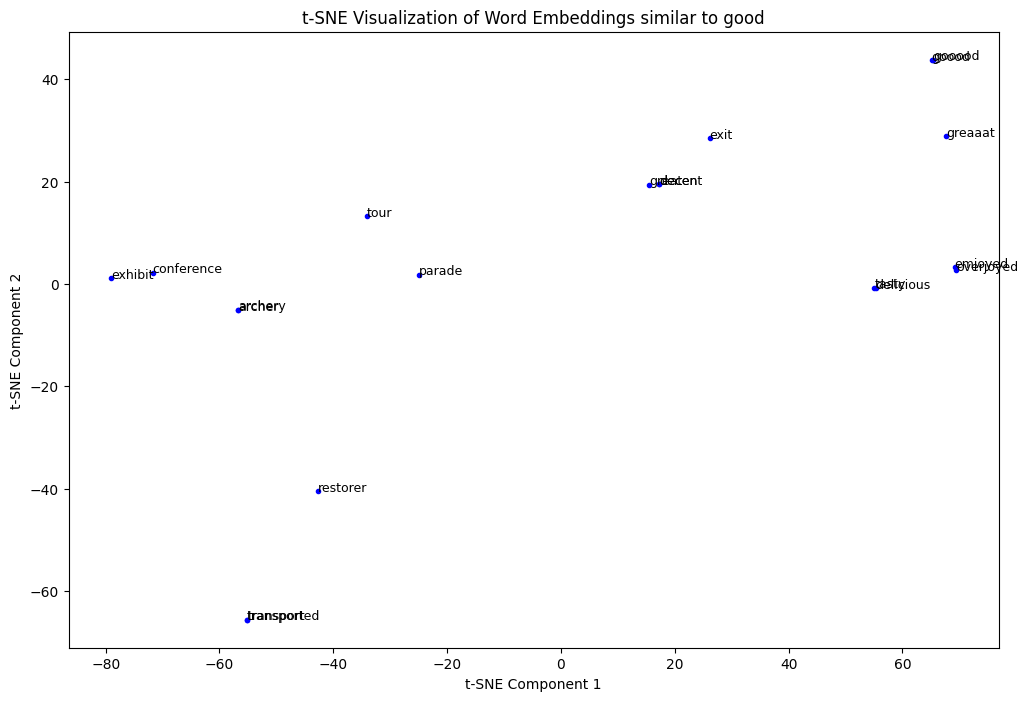

In [ ]:
similar_words_dict = dict(similar_words)
opposite_words_dict = dict(opposite_words)

# Filter the DataFrame for visualization
df_vis_subset = df_vis[df_vis.index.isin(similar_words_dict.keys()) | df_vis.index.isin(opposite_words_dict.keys())]

# Plot the word embeddings for the subset
plt.figure(figsize=(12, 8))
for word, (x, y) in df_vis_subset.iterrows():
    plt.scatter(x, y, marker='.', color='blue')
    plt.text(x, y, word, fontsize=9)

plt.title('t-SNE Visualization of Word Embeddings similar to good')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# **7. Facebook pretrained model**

In [ ]:
facebook_model = api.load('fasttext-wiki-news-subwords-300')#  Facebook FastText model

In [ ]:

from gensim.models import KeyedVectors
word_to_test = "good"

# Check if the model is a KeyedVectors object
if isinstance(facebook_model, KeyedVectors):
    similar_words = facebook_model.most_similar(word_to_test, topn=10)
    print(f"Similar words to '{word_to_test}'")
    for word, similarity in similar_words:
        print(f"('{word}', {similarity})")
    print('----------------------------------------------------')

    opposite_words = facebook_model.most_similar(negative=[word_to_test], topn=10)
    print(f"Opposite words to '{word_to_test}'")
    for word, similarity in opposite_words:
        print(f"('{word}', {similarity})")
else:
    print("The loaded model is not a KeyedVectors object.")


Similar words to 'good'
('bad', 0.8503088355064392)
('goood', 0.8107685446739197)
('excellent', 0.7996695041656494)
('decent', 0.781157374382019)
('.good', 0.7647460103034973)
('great', 0.7640494704246521)
('nice', 0.7610529661178589)
('not-so-good', 0.7542024254798889)
('good--and', 0.74726402759552)
('good-enough', 0.7471089363098145)
----------------------------------------------------
Opposite words to 'good'
('അന', 0.5121632218360901)
('रष', 0.5075791478157043)
('വന', 0.5039740204811096)
('சர', 0.50338214635849)
('നത', 0.5031063556671143)
('യത', 0.5025681257247925)
('ഗ', 0.5014341473579407)
('കി', 0.5005525946617126)
('تضم', 0.49999213218688965)
('དུ', 0.4970552325248718)


# **8. Comparing the results**


* The pre-trained model offers more diverse and contextually relevant similar words to 'good' with higher similarity scores.

* The pre-trained model also provides opposite words in different languages.